In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
raw_data = pd.read_csv("AirPassengers.csv")
raw_data

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

# New section

In [ ]:
# AR(12)
X = raw_data['#Passengers'].values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=505.769496, expected=535.000000
predicted=596.250450, expected=622.000000
predicted=603.673680, expected=606.000000
predicted=531.693171, expected=508.000000
predicted=452.936353, expected=461.000000
predicted=405.253902, expected=390.000000
predicted=440.575851, expected=432.000000


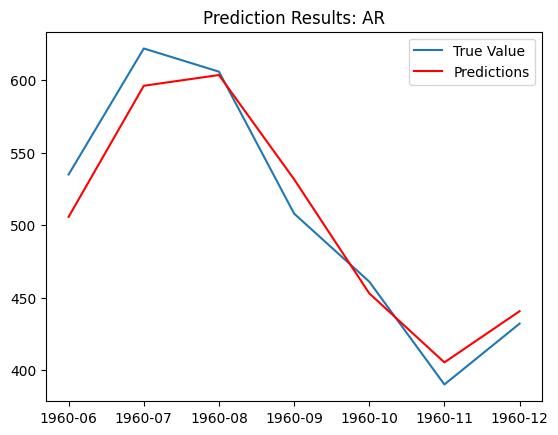

In [ ]:
pyplot.plot(raw_data['Month'].values[len(X)-7:], test, label='True Value')
pyplot.plot(raw_data['Month'].values[len(X)-7:], predictions, color='red', label='Predictions')
#pyplot.xlabel(raw_data['Month'].values[len(X)-7:])
pyplot.legend()
pyplot.title('Prediction Results: AR')
pyplot.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residual = model_fit.resid
white_noise = acorr_ljungbox(residual, lags = [12], return_df=True)

In [ ]:
white_noise
# residual is not white noise as p value < 0.05

lb_stat     lb_pvalue
12  88.408915  1.002747e-13

In [ ]:
from statsmodels.stats.diagnostic import het_arch
LM_pvalue = het_arch(residual, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))
# cannot reject the null hypothesis that there is no ARCH effect

LM-test-Pvalue: 0.22942


In [ ]:
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
import numpy as np
# seed the process
np.random.seed(1)
# Simulating a GARCH(1, 1) process
a0 = 0.2
a1 = 0.5
b1 = 0.3
n = 1000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)
for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])
model = arch_model(eps)
model_fit = model.fit()
print(model_fit.summary)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1250663107407.7095
Iteration:      2,   Func. Count:     14,   Neg. LLF: 549074160.9367719
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1409.282929764152
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1243.0665846048712
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1365.0978170276599
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1178.9624711317597
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1178.4548571627367
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1178.1875367910015
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1178.0880068466704
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1178.0818755663745
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1178.0817768536654
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1178.0817748468353
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1178.081774846923
Optimization terminated successfully    (Exit mode 0)


In [ ]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Generate some example financial returns data
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Create a pandas DataFrame
returns_df = pd.DataFrame(returns, columns=['Returns'])

# Fit a GARCH(1, 1) model to the returns data
model = arch_model(returns_df, vol='Garch', p=1, q=1)
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the estimated conditional volatility
conditional_volatility = results.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(conditional_volatility)
plt.title('Conditional Volatility (GARCH(1, 1))')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

import yfinance as yf

In [ ]:
ticker= "USDJPY=X"
tsla_data = yf.download(ticker, start="2018-01-01", end="2023-08-31")
tsla_data

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2018-01-01  112.680000  112.690002  112.669998  112.666000  112.666000       0
2018-01-02  112.769997  112.788002  112.074997  112.769997  112.769997       0
2018-01-03  112.264000  112.485001  112.193001  112.244003  112.244003       0
2018-01-04  112.606003  112.853996  112.507004  112.607002  112.607002       0
2018-01-05  112.790001  113.289001  112.731003  112.782997  112.782997       0
...                ...         ...         ...         ...         ...     ...
2023-08-24  144.673004  145.947006  144.621002  144.673004  144.673004       0
2023-08-25  146.067001  146.604996  145.733994  146.067001  146.067001       0
2023-08-28  146.531006  146.716003  146.278000  146.531006  146.531006       0
2023-08-29  146.464005  147.343994  145.852005  146.464005  146.464005       0
2023-08-30  145.988007  146.522995  145.557999  145.988007  145.988007       0

[1477 rows x 6 columns]

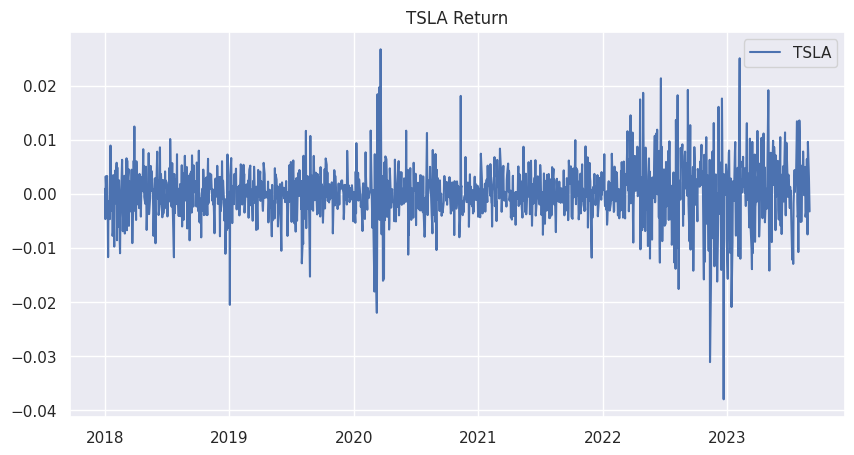

In [ ]:
tsla_data['Return'] =  np.log(tsla_data['Adj Close']) - np.log(tsla_data['Adj Close'].shift(1))
tsla_data.dropna(inplace=True)
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(tsla_data['Return'], label = 'TSLA')
plt.title('TSLA Return')
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller

price_p_value = adfuller(tsla_data['Return'])[1]
print('Stock Price ADF-P value:', '{:.5f}'.format(price_p_value))
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Stock Price ADF-P value: 0.00000
Stationary


In [ ]:
data = tsla_data[['Return']]
data.head()

Return
Date                
2018-01-02  0.000923
2018-01-03 -0.004675
2018-01-04  0.003229
2018-01-05  0.001562
2018-01-08  0.003284

In [ ]:
train_date = data.index.get_level_values('Date') <= '2022-12-31'
train_data = data[train_date]
test_data = data[~train_date]

In [ ]:
import pmdarima as pmd

In [ ]:
pmd_mdl = pmd.auto_arima(train_data['Return'], stationary = True)
pmd_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1303
Model:                        SARIMAX   Log Likelihood                5061.907
Date:                Sun, 01 Oct 2023   AIC                         -10121.814
Time:                        17:05:39   BIC                         -10116.642
Sample:                             0   HQIC                        -10119.874
                               - 1303                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.473e-05   4.82e-07     51.269      0.000    2.38e-05    2.57e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):              2081.57
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Return'], order = (2, 0, 2))
stats_mdl = model.fit()
print(stats_mdl.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 1303
Model:                 ARIMA(2, 0, 2)   Log Likelihood                5061.748
Date:                Sun, 01 Oct 2023   AIC                         -10111.496
Time:                        17:05:41   BIC                         -10080.461
Sample:                             0   HQIC                        -10099.853
                               - 1303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.858      0.391      -0.000       0.000
ar.L1         -0.9187      0.255     -3.596      0.000      -1.419      -0.418
ar.L2         -0.8101      0.189     -4.297      0.0

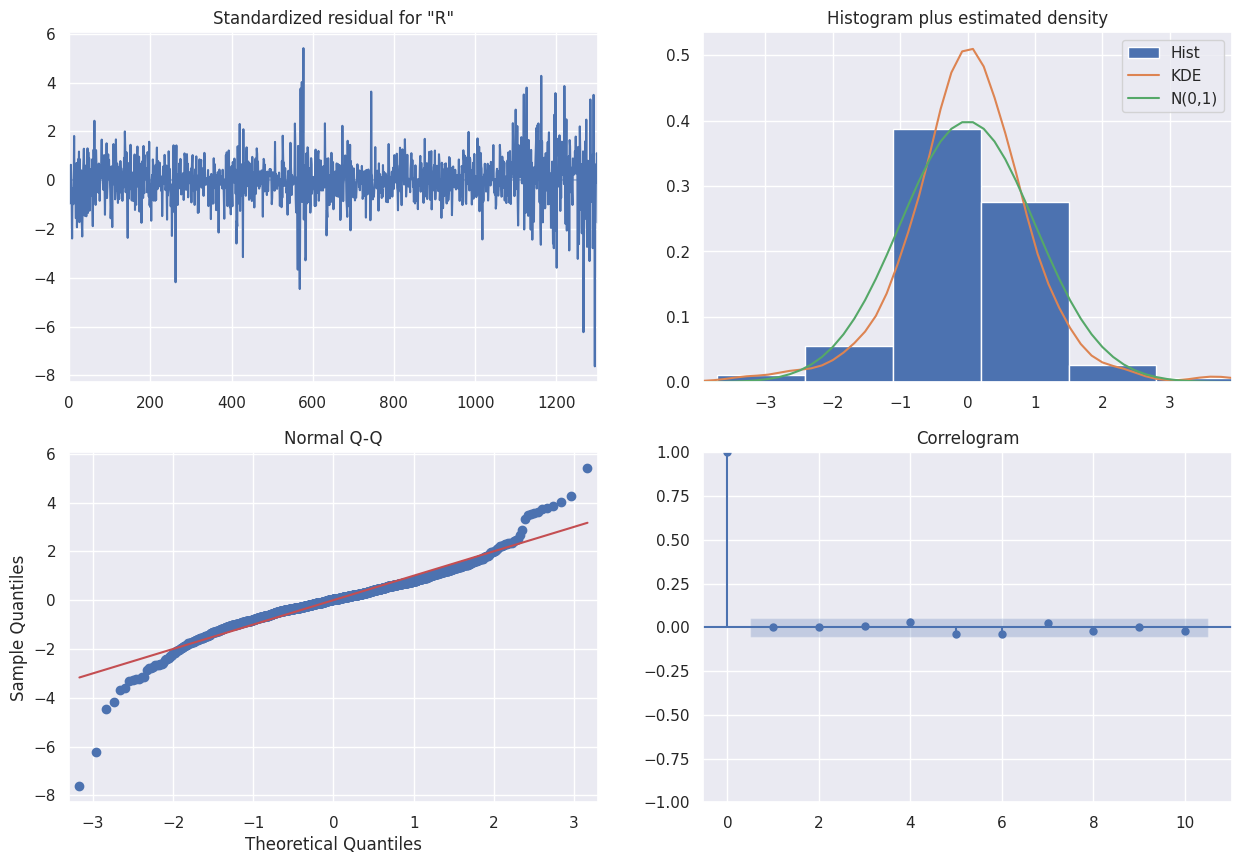

In [ ]:
stats_mdl.plot_diagnostics(figsize = (15, 10))
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

arima_resid = pmd_mdl.arima_res_.resid

white_noise_arima = acorr_ljungbox(arima_resid, lags = [10], return_df=True)
white_noise_arima

lb_stat  lb_pvalue
10  5.763394   0.834735

In [ ]:
from statsmodels.stats.diagnostic import het_arch

LM_pvalue = het_arch(arima_resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.00000


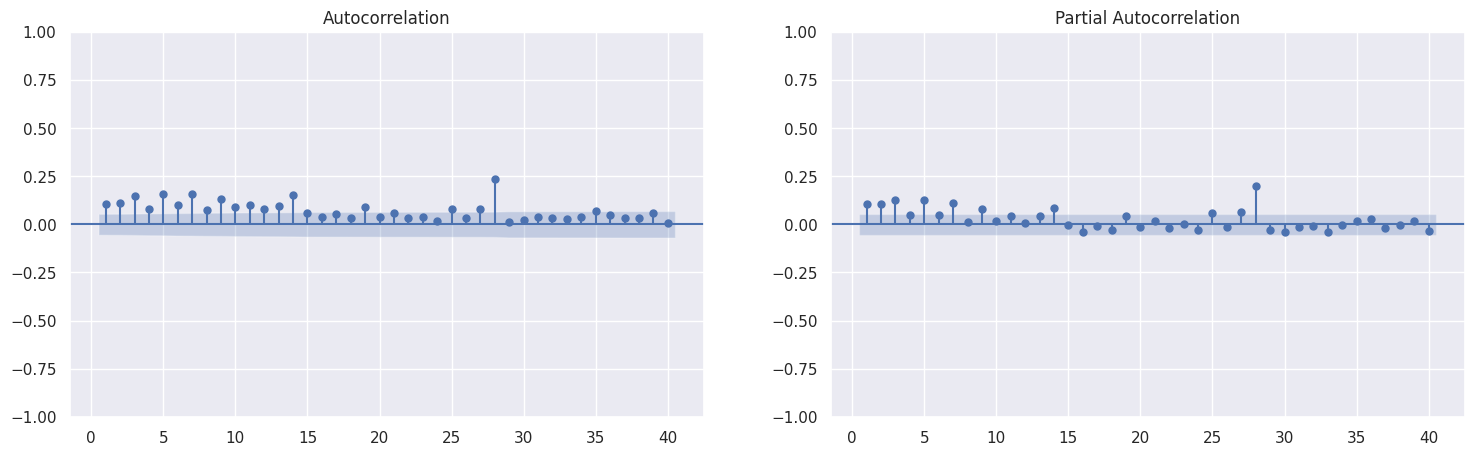

In [ ]:
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(1, 2, figsize = (18,5))

sgt.plot_acf(arima_resid**2, zero = False, lags = 40, ax=ax[0])
sgt.plot_pacf(arima_resid**2, zero = False, lags = 40, ax=ax[1])

plt.show()

In [ ]:
from arch import arch_model
mdl_garch = arch_model(arima_resid, vol = 'GARCH', p = 1, q = 1)
garch_fit = mdl_garch.fit()
garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2374774454589915e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: -5211.942545434644
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5211.9425410124495
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.471e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5211.94
Distribution:                  Normal   AIC:                          -10415.9
Method:            Maximum Likelihood   BIC:                          -10395.2
                                        No. Observations:                 1303
Date:                Sun, Oct 01 2023   Df Residuals:                     1302
Time:                        17:07:04   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5319e-04  2.014e-06     76.074      0.000 [1.492e-04,1.571e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.9428e-07  4.465e-11  1.107e+04      0.000 [4.942e-07,4.944e-07]
alpha[1]       0.1000  2.187e-02      4.572  4.830e-06   [5.713e-02,  0.143]
beta[1]        0.8800  1.883e-02     46.746      0.000     [  0.843,  0.917]
============================================================================

Covariance estimator: robust
"""

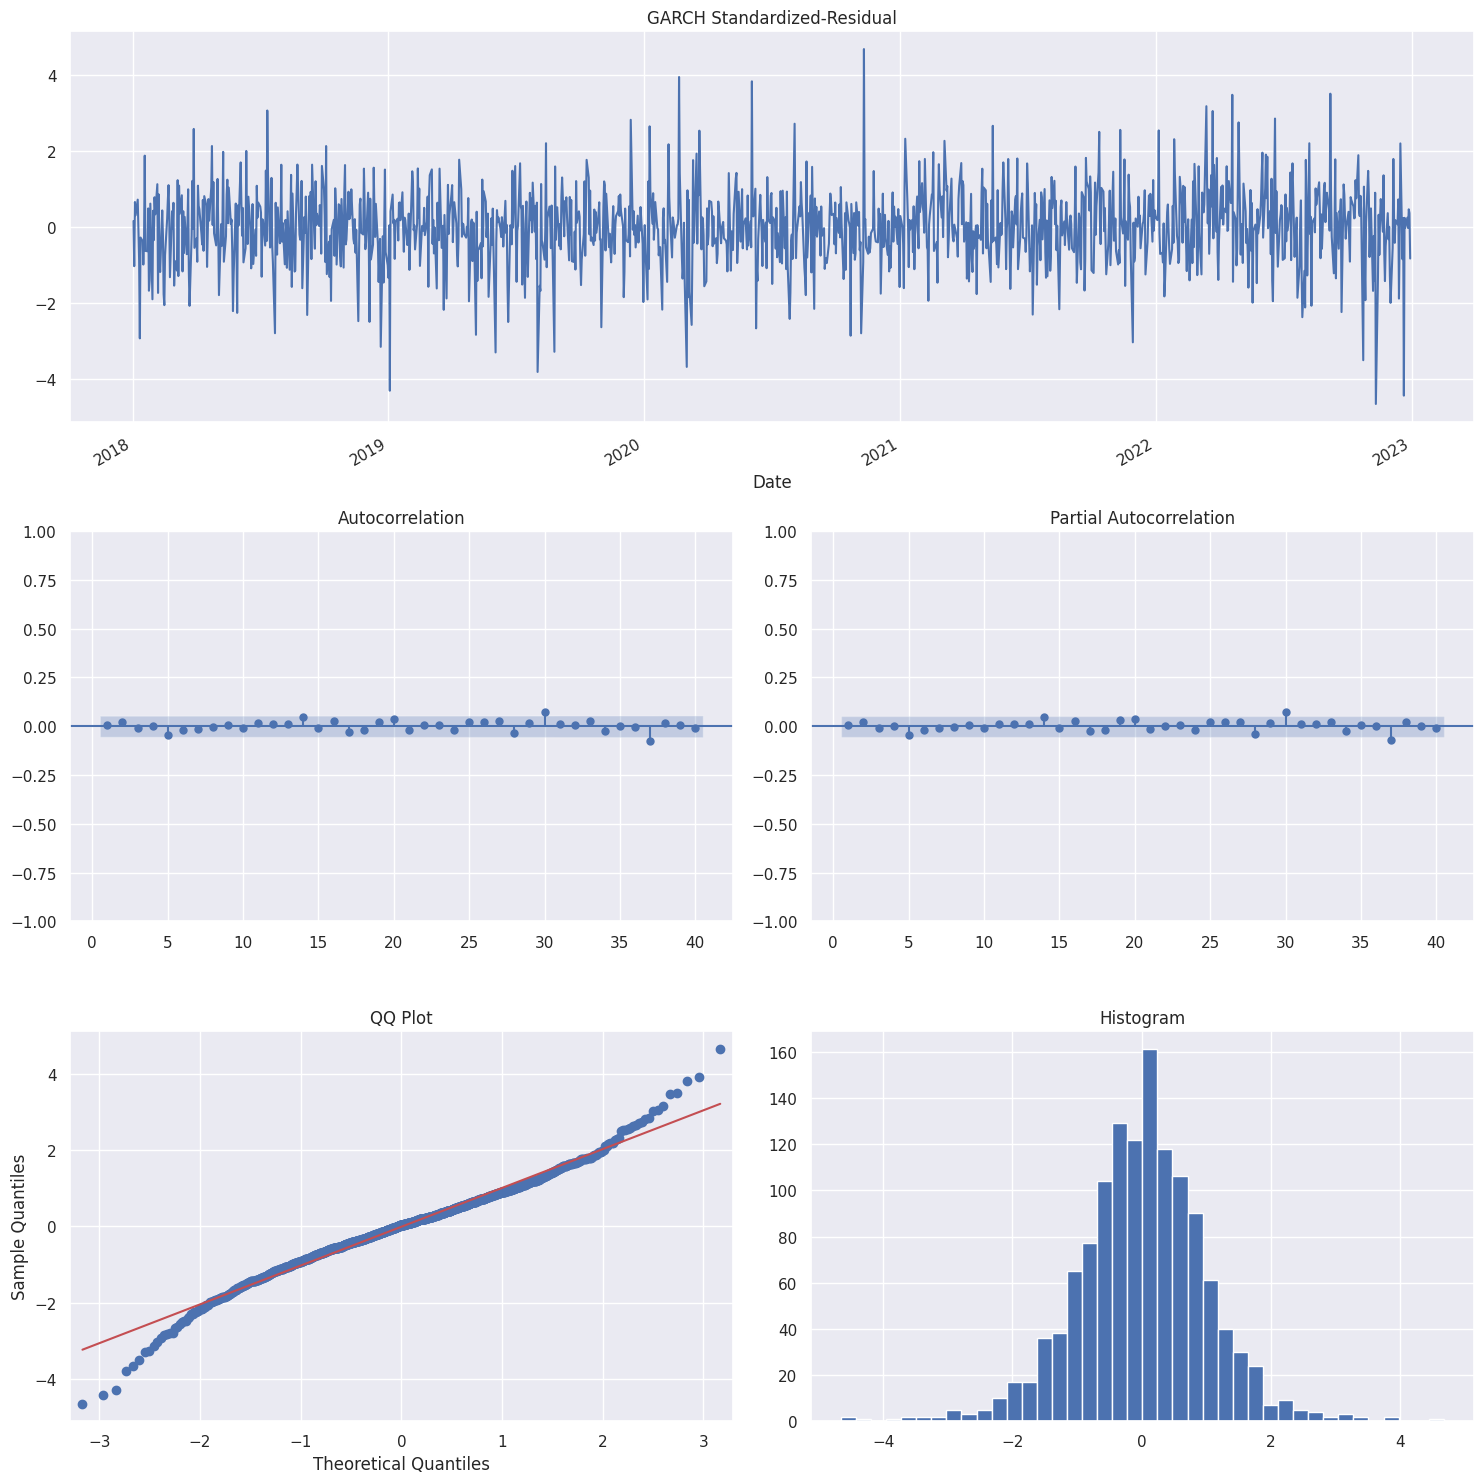

In [ ]:
import statsmodels.api as sm

garch_std_resid = pd.Series(garch_fit.resid / garch_fit.conditional_volatility)
fig = plt.figure(figsize = (15, 15))

# Residual
garch_std_resid.plot(ax = fig.add_subplot(3,1,1), title = 'GARCH Standardized-Residual', legend = False)

# ACF/PACF
sgt.plot_acf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,3))
sgt.plot_pacf(garch_std_resid, zero = False, lags = 40, ax=fig.add_subplot(3,2,4))

# QQ-Plot & Norm-Dist
sm.qqplot(garch_std_resid, line='s', ax=fig.add_subplot(3,2,5))
plt.title("QQ Plot")
fig.add_subplot(3,2,6).hist(garch_std_resid, bins = 40)
plt.title("Histogram")

plt.tight_layout()
plt.show()

In [ ]:
white_noise_garch = acorr_ljungbox(garch_std_resid, lags = [10], return_df=True)
white_noise_garch